<a href="https://colab.research.google.com/github/apd2599/Training_2021_CIRCUIT/blob/main/Scikit-Learn_Dataset/BMI_Diabetes_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import random_projection
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn import tree

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#loading the dataset
db_data = datasets.load_diabetes()

In [ ]:
#check for the description of the dataset, this description gives details on the specific features that are measured

print(db_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

#Data Preprocessing



In [ ]:
#transfering the dataset into different variables
data = db_data['data']
target = db_data['target']
features = db_data['feature_names']

In [ ]:
#Computes the mean and std to be used for later scaling. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
data_ss = StandardScaler().fit_transform(data)

In [ ]:
#sets up the data into a pandas dataframe
Xdf = pd.DataFrame(data_ss, columns=features)
ys = pd.Series(target)

In [ ]:
#check the columns
Xdf.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

#Exploratory Data Analysis


For this dataset exercise, I will be focusing on the BMI of a patient. Based on my other diabetes notebook, it was the only feature that had somewhat of a correlation with the progression of diabetes one year after the baseline. 

Text(0, 0.5, 'percentage of people')

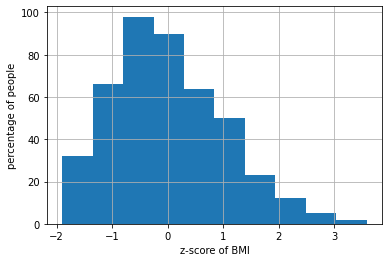

In [ ]:
#plot a histogram to check general trend in bmi scores
Xdf.bmi.hist()
plt.xlabel('z-score of BMI')
plt.ylabel('percentage of people')

There is a slight skewness to the right of the median. This implies that the mean of the data will be larger than median. https://www.dummies.com/education/math/statistics/how-to-identify-skew-and-symmetry-in-a-statistical-histogram/

In [ ]:
#To create a correlation table, I must include my y-output with my pandas dataset. 
Xdf['target'] = ys
Xdf.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,135.0


In [ ]:
#Create the correlation table
Xdf[['bmi', 'target']].corr()

,bmi,target
bmi,1.00000,0.58645
target,0.58645,1.00000


As you can see, this is not the strongest correlation, rather it is a moderate one. https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


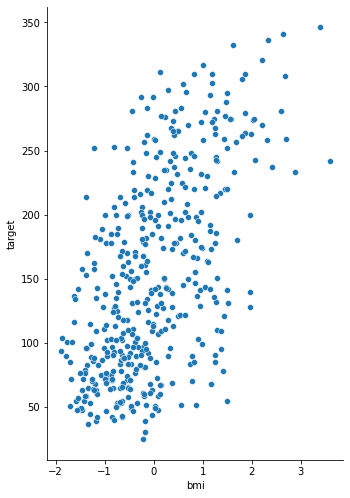

In [ ]:
#Create a scatter plot to visualize the relationship between bmi and target
sns.pairplot(Xdf, x_vars='bmi', y_vars='target', size=7, aspect=0.7)

Based on the output, I wonder if normalizing the values for BMI instead of using the actual values affects the value of correlation and outlook of the scatterplot. 

#Model Building

Most of these steps were taken from this useful webpage, https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

In [ ]:
#create a fitted model
lml = smf.ols(formula='target ~ bmi', data=Xdf).fit()

#print the coefficients
lml.params

Intercept    152.133484
bmi           45.160030
dtype: float64

In [ ]:
#create X and Y
#the bmi will be the independent variable while the target is the dependent variable
X = np.array(Xdf['bmi'])
y = np.array(ys)

#instantiate and fit
lm2 = LinearRegression()
lm2.fit(X.reshape(-1, 1), y)

#print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

152.13348416289594
[45.16003002]


An increase in BMI is a increase in 45.16 unit increase in diabetes progression in one year.

These values represent associations not causations. https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


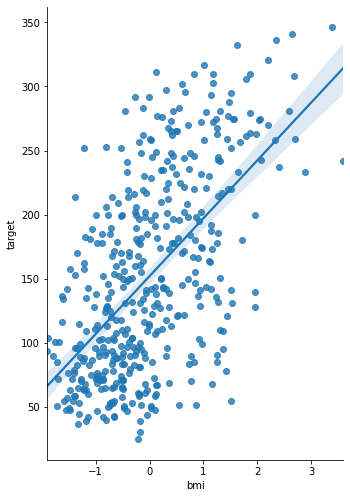

In [ ]:
sns.pairplot(Xdf, x_vars='bmi', y_vars='target', size=7, aspect=0.7, kind='reg')

In [ ]:
lml.conf_int()

,0,1
Intercept,146.289375,157.977593
bmi,39.315921,51.004139


In [ ]:
lml.pvalues

Intercept    2.452874e-187
bmi           3.466006e-42
dtype: float64